In [67]:
import pandas as pd

file_path = r"C:\Users\mbidi\OneDrive - University of Ottawa\Winter 25\AI-Cybrsec\Project\Project Work\Insider-Threat-Detection\Insider Threat Dataset\NIV1608.csv"
df = pd.read_csv(file_path)

df

,user,week,after_hours_logons,num_exe_files,num_usb_insertions,num_other_pc,insider
0,NIV1608,2010-01,3,0,0.0,0,0
1,NIV1608,2010-02,2,0,0.0,0,0
2,NIV1608,2010-03,4,0,0.0,0,0
3,NIV1608,2010-04,1,0,0.0,0,0
4,NIV1608,2010-05,2,0,0.0,0,0
...,...,...,...,...,...,...,...
56,NIV1608,2011-05,5,0,7.0,0,1
57,NIV1608,2011-06,7,0,7.0,0,1
58,NIV1608,2011-07,3,0,4.0,0,0
59,NIV1608,2011-08,1,0,0.0,0,0


In [68]:
from sklearn.ensemble import IsolationForest
# Select relevant features
features = ["after_hours_logons", "num_exe_files", "num_usb_insertions", "num_other_pc"]
X = df[features]

# Train Isolation Forest
model = IsolationForest(contamination='auto', random_state=42)
model.fit(X)  # -1: anomaly, 1: normal

df['anomaly'] = model.predict(X)
df['anomaly_score'] = model.decision_function(X)

df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Display detected anomalies
# anomalies = df[df["insider"] == 1]
# anomalies

df

,user,week,after_hours_logons,num_exe_files,num_usb_insertions,num_other_pc,insider,anomaly,anomaly_score
0,NIV1608,2010-01,3,0,0.0,0,0,0,0.074903
1,NIV1608,2010-02,2,0,0.0,0,0,0,0.092951
2,NIV1608,2010-03,4,0,0.0,0,0,1,-0.032106
3,NIV1608,2010-04,1,0,0.0,0,0,0,0.014492
4,NIV1608,2010-05,2,0,0.0,0,0,0,0.092951
...,...,...,...,...,...,...,...,...,...
56,NIV1608,2011-05,5,0,7.0,0,1,1,-0.271538
57,NIV1608,2011-06,7,0,7.0,0,1,1,-0.301092
58,NIV1608,2011-07,3,0,4.0,0,0,1,-0.255041
59,NIV1608,2011-08,1,0,0.0,0,0,0,0.014492


In [69]:
anomalies = df[df["insider"] == 1]
anomalies


,user,week,after_hours_logons,num_exe_files,num_usb_insertions,num_other_pc,insider,anomaly,anomaly_score
56,NIV1608,2011-05,5,0,7.0,0,1,1,-0.271538
57,NIV1608,2011-06,7,0,7.0,0,1,1,-0.301092


# Threadhold = 0.15

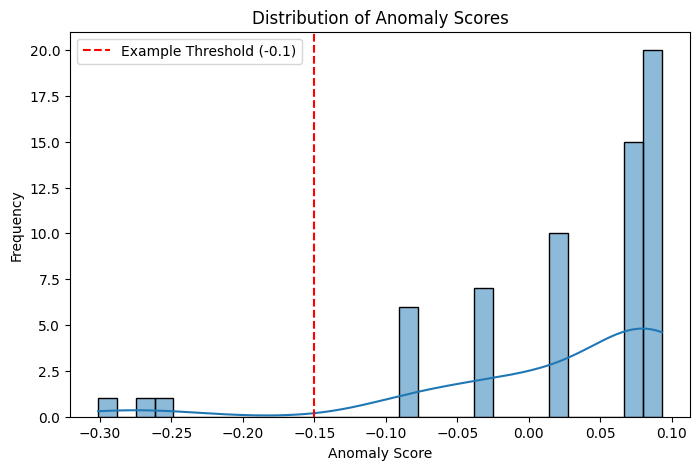

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot decision function scores
plt.figure(figsize=(8, 5))
sns.histplot(df["anomaly_score"], bins=30, kde=True)
plt.axvline(x=-0.15, color='r', linestyle='--', label="Example Threshold (-0.1)")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.title("Distribution of Anomaly Scores")
plt.legend()
plt.show()


In [71]:
# Set a threshold for anomaly detection
custom_threshold = -0.15  # Adjust this value to experiment

# Flag anomalies based on decision function threshold
df["anomaly"] = df["anomaly_score"] < custom_threshold

# Display detected anomalies
anomalies = df[df["anomaly"] == True]
anomalies

,user,week,after_hours_logons,num_exe_files,num_usb_insertions,num_other_pc,insider,anomaly,anomaly_score
56,NIV1608,2011-05,5,0,7.0,0,1,True,-0.271538
57,NIV1608,2011-06,7,0,7.0,0,1,True,-0.301092
58,NIV1608,2011-07,3,0,4.0,0,0,True,-0.255041


In [74]:
f1_score(y_train, df["anomaly"])
recall_score(y_train, df["anomaly"])
precision_score(y_train, df["anomaly"])


0.6666666666666666

In [65]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score 

y_train = df["insider"]

# Get decision function scores (negative outlier factor)
decision_scores = model.decision_function(X)  # Higher is inlier, lower is outlier

# Define different threshold values for anomaly detection
thresholds = np.percentile(decision_scores, [5, 10, 15, 20, 25])  # Try different percentiles

# Loop through each threshold and compute precision, recall, F1-score
for threshold in thresholds:
    y_pred = np.where(decision_scores < threshold, 1, 0)  # Label as "1" if below threshold (anomaly)

    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    print(f"Threshold = {threshold:.4f}: Precision = {precision:.4f}, Recall = {recall:.4f}, F1 Score = {f1:.4f}")

Threshold = -0.0811: Precision = 0.6667, Recall = 1.0000, F1 Score = 0.8000
Threshold = -0.0811: Precision = 0.6667, Recall = 1.0000, F1 Score = 0.8000
Threshold = -0.0321: Precision = 0.2222, Recall = 1.0000, F1 Score = 0.3636
Threshold = -0.0321: Precision = 0.2222, Recall = 1.0000, F1 Score = 0.3636
Threshold = -0.0321: Precision = 0.2222, Recall = 1.0000, F1 Score = 0.3636
